---
### 2. Data Cleaning and Visual Informatics

<i> In this part of project, the raw data are preprocessed of such as removing the redundant data and characters, and computing the net positive feedbacks. The data are also visualized to ease better understanding of the distributions of and relations between the variables.</i>


In [58]:
import pandas as pd #for data manipulation 
import numpy as np # NumPy is a library working for array
import matplotlib.pyplot as plt #for ploting graphs
import seaborn as sns # Import seaborn library for ploting graphs

In [59]:
openrice = pd.read_csv("japanese restaurant.csv")
openrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5897 entries, 0 to 5896
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5897 non-null   int64  
 1   Title            5897 non-null   object 
 2   Area             5727 non-null   object 
 3   Location         5881 non-null   object 
 4   Bookmarks        5743 non-null   float64
 5   Positive Review  4286 non-null   float64
 6   Negative Review  4331 non-null   float64
 7   Review Count     4447 non-null   object 
 8   PriceRange       5897 non-null   object 
 9   Genre            5897 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 460.8+ KB


In [60]:
for col in openrice.columns:
    print(openrice[col].value_counts())

#sns.heatmap(openrice.isnull(), cbar=False)

0       1
3928    1
3937    1
3936    1
3935    1
       ..
1964    1
1963    1
1962    1
1961    1
5896    1
Name: Unnamed: 0, Length: 5897, dtype: int64
Tian Jian IZAKAYA 天澗居酒屋                               176
Yakitoriya Hon 燒鳥屋本                                   158
Wagyu Yakiniku Ichiro (All Branches) 和牛燒肉一郎 (寶漢大廈)    154
Ryou Dou Raku 漁道樂                                     149
N.28 Teppanyaki                                       148
                                                     ... 
Otaru 小樽和牛店                                             1
Ori Yume                                                1
The Cottage                                             1
Emperor Sushi Takeaway 明皇壽司外帶店                          1
Cafe Grouchos                                           1
Name: Title, Length: 3016, dtype: int64
Tsim Sha Tsui    988
Yuen Long        389
Causeway Bay     371
Central          349
Mong Kok         279
                ... 
旺角                 1
銅鑼灣                1

In [61]:
openrice = pd.read_csv("japanese restaurant.csv")
award_data = pd.read_csv("Award restaurant.csv")

def processdata (df):

    #Remove duplicate restaurant
    df=df.drop_duplicates(subset=['Title']) #remove all the duplicated results
    df=df.dropna() # remove the incomplete data

    ## Remove unnessary symbol and add Address column 
    df['Food'] = df['Genre'].str.split(',').str[1] # processing the string 
    df['Street'] = df['Location'].str.split(',').str[-2]
    df['addr'] = (df['Street'] + ' ' + df['Area'] ).str.strip()

    spec_chars = ["!",'"',"#","%","'","(",")",
                  "*","+","-",".",":",";","<",
                  "=",">","?","@","[","\\","]","^","_",
                  "`","{","|","}","~","–"]

    for char in spec_chars:
        for cols in ['Review Count','Genre','Food']:
            df[cols] = df[cols].str.replace(char, ' ')

    #### Remove Chinese Character in Area column
    df['Area'] = df['Area'].apply(lambda row: row.encode('ascii',errors='ignore').decode())
    df=df.dropna()

    ##Extracting the Review Count number column
    df['Review Count'] = df['Review Count'].str.extract('(\d+)')
    df["Review Count"] = pd.to_numeric(df["Review Count"])
    df = df.drop(columns=['Unnamed: 0'])

    ## Add Net Positive Review column 
    df.insert(6,'Net Positive Review',df['Positive Review'] - df['Negative Review'])
    
    return df

award_data=processdata(award_data)
openrice=processdata(openrice)

/var/folders/6j/hv88xhx917v5cmyj88ncpzhw0000gn/T/ipykernel_79236/3101431199.py:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[cols] = df[cols].str.replace(char, ' ')


In [62]:
openrice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2437 entries, 3 to 5869
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                2437 non-null   object 
 1   Area                 2437 non-null   object 
 2   Location             2437 non-null   object 
 3   Bookmarks            2437 non-null   float64
 4   Positive Review      2437 non-null   float64
 5   Negative Review      2437 non-null   float64
 6   Net Positive Review  2437 non-null   float64
 7   Review Count         2437 non-null   int64  
 8   PriceRange           2437 non-null   object 
 9   Genre                2437 non-null   object 
 10  Food                 2437 non-null   object 
 11  Street               2437 non-null   object 
 12  addr                 2437 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 266.5+ KB


In [63]:
openrice

,Title,Area,Location,Bookmarks,Positive Review,Negative Review,Net Positive Review,Review Count,PriceRange,Genre,Food,Street,addr
3,Towada Sushi 十和田總本店,Tsim Sha Tsui,"G/F, Chinachem Cameron Centre, 42 Cameron Road...",44991.0,1197.0,39.0,1158.0,1375,$201-400,"Japanese , Sushi/Sashimi",Sushi/Sashimi,42 Cameron Road,42 Cameron Road Tsim Sha Tsui
4,Gram cafe & pancakes,Tsim Sha Tsui,"Shop L408, 4/F, The ONE, 100 Nathan Road, Tsim...",21147.0,1024.0,148.0,876.0,1464,$101-200,"Japanese , Dessert",Dessert,100 Nathan Road,100 Nathan Road Tsim Sha Tsui
5,KOKON2 (Kwun Tong Industrial Centre) 古今二 (官塘工業中心),Kwun Tong,"Room B, 1/F, Kwun Tong Industrial Centre Phase...",36178.0,825.0,14.0,811.0,975,$201-400,"Japanese , Sushi/Sashimi",Sushi/Sashimi,436-446 Kwun Tong Road,436-446 Kwun Tong Road Kwun Tong
6,Shinko 申子居酒屋,Mong Kok,"Shop 1, G/F, Ngai Hing Mansion, 74-76 Hak Po S...",47156.0,787.0,18.0,769.0,884,$201-400,"Japanese , Wine",Wine,74-76 Hak Po Street,74-76 Hak Po Street Mong Kok
7,Poach 蟲二,Mong Kok,"Rooftop, 618 Shanghai Street, Mong Kok",40615.0,535.0,43.0,492.0,738,$101-200,"Japanese , Cake",Cake,618 Shanghai Street,618 Shanghai Street Mong Kok
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5839,UMI at the Ocean (Moved),Repulse Bay,"Shop 303-304, 3/F, The Pulse, 26-30 Beach Road...",162.0,1.0,0.0,1.0,1,$401-800,"Japanese , Sushi/Sashimi",Sushi/Sashimi,26-30 Beach Road,26-30 Beach Road Repulse Bay
5850,Taste of Home 本家味居酒屋,Sham Tseng,"G/F, 57 Sham Tseng Village, Castle Peak Road, ...",303.0,9.0,1.0,8.0,13,$201-400,"Japanese , Izakaya",Izakaya,Castle Peak Road,Castle Peak Road Sham Tseng
5851,新井食堂,Sham Tseng,"G/F, 94 Sham Tseng Tsuen, Sham Tseng",166.0,8.0,2.0,6.0,15,Below $50,"Japanese , Curry",Curry,94 Sham Tseng Tsuen,94 Sham Tseng Tsuen Sham Tseng
5857,Ebisu Japanese Restaurant 惠比壽居食屋,Ma Wan,"No. 33, Tin Liu New Village,, Ma Wan",395.0,9.0,2.0,7.0,16,$51-100,"Japanese , Sushi/Sashimi",Sushi/Sashimi,,Ma Wan


In [64]:
award_data

,Title,Area,Location,Bookmarks,Positive Review,Negative Review,Net Positive Review,Review Count,PriceRange,Genre,Food,Street,addr
3,Poach 蟲二,Mong Kok,"Rooftop, 618 Shanghai Street, Mong Kok",40615.0,535.0,43.0,492.0,738,$101-200,"Japanese , Cake",Cake,618 Shanghai Street,618 Shanghai Street Mong Kok
4,Tea Brush 茶墨,Tsim Sha Tsui,"Shop L411, 4/F, The ONE, 100 Nathan Road, Tsim...",9200.0,792.0,25.0,767.0,1041,Below $50,"Japanese , Tea House",Tea House,100 Nathan Road,100 Nathan Road Tsim Sha Tsui
5,Yuki House Ramen 幸屋,Wan Chai,"G/F, Wai Cheong Building, 5-9A Gresson Street,...",16907.0,639.0,18.0,621.0,718,$51-100,"Japanese , Ramen",Ramen,5-9A Gresson Street,5-9A Gresson Street Wan Chai
6,Tsukiji Japanese Restaurant (Island Beverley) ...,Causeway Bay,"Room R1, 7/F, Island Beverley, 1 Great George ...",20505.0,826.0,19.0,807.0,933,$101-200,"Japanese , Sushi/Sashimi",Sushi/Sashimi,1 Great George Street,1 Great George Street Causeway Bay
7,Isono Suisan 磯野水產,Causeway Bay,"19/F, Macau Yat Yuen Centre, 525 Hennessy Road...",28214.0,855.0,10.0,845.0,895,$201-400,"Japanese , Seafood",Seafood,525 Hennessy Road,525 Hennessy Road Causeway Bay
8,J-City 丼瀛,Kwun Tong,"Shop B, 1/F, COS Centre, 56 Tsun Yip Street, K...",18124.0,516.0,9.0,507.0,569,$101-200,"Japanese , Sushi/Sashimi",Sushi/Sashimi,56 Tsun Yip Street,56 Tsun Yip Street Kwun Tong
9,Fukuoka Hambageu 福岡漢堡扒,Tsim Sha Tsui,"Shop A, G/F, 11 Hau Fook Street, Tsim Sha Tsui",15800.0,499.0,10.0,489.0,584,$101-200,"Japanese , Korean BBQ",Korean BBQ,11 Hau Fook Street,11 Hau Fook Street Tsim Sha Tsui
10,Lucky Ristorante,Mong Kok,"Shop 301B, 3/F, 618 Shanghai Street, Mong Kok",13625.0,401.0,6.0,395.0,456,$101-200,"Japanese , Pizza",Pizza,618 Shanghai Street,618 Shanghai Street Mong Kok
11,Pancake House HoiHoi (Megabox),Kowloon Bay,"Shop 19-20, 1/F, Enterprise Square Five, Megab...",9456.0,407.0,17.0,390.0,525,$101-200,"Japanese , Dessert",Dessert,38 Wang Chiu Road,38 Wang Chiu Road Kowloon Bay
12,Asa 朝,Prince Edward,"G/F, 39 Tai Nan Street, Prince Edward",11284.0,349.0,15.0,334.0,386,$201-400,"Japanese , Sushi/Sashimi",Sushi/Sashimi,39 Tai Nan Street,39 Tai Nan Street Prince Edward


In [65]:
# Save all revised and awarded restaurant data as csv and xlsx file
openrice.to_csv("japanese restaurant_full.csv")
openrice.to_excel("japanese restaurant_full.xlsx")

award_data.to_csv("Award restaurant_full.csv")
award_data.to_excel("Award restaurant_full.xlsx")

#### Histogram and Relational Plot
<i> From the bar chart, We find that a large number of restaurants have their price range set to \\$51-100 and \\$101-200.

Also, an Interesting fact is that the number of sushi restaurants is significantly higher than other genres. The second-highest number of restaurants by genre is ramen.

These plotting give us a general view of the japanese restaurants information. Before drawing any conclusion ,we need to apply some data-analytics tools. </i>

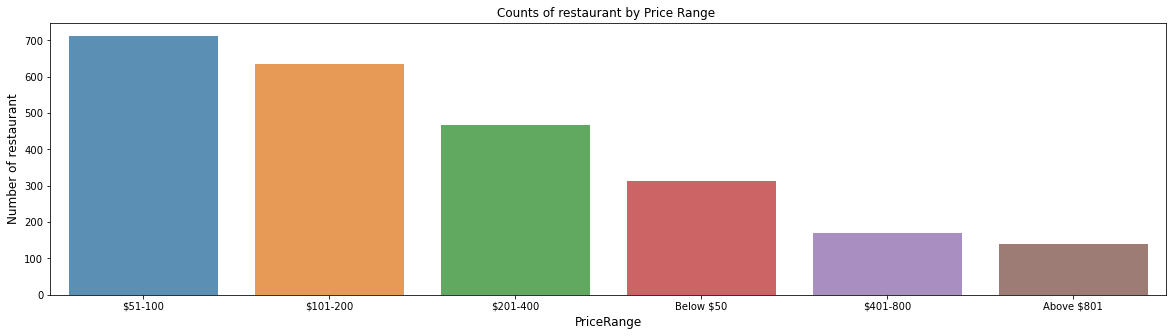

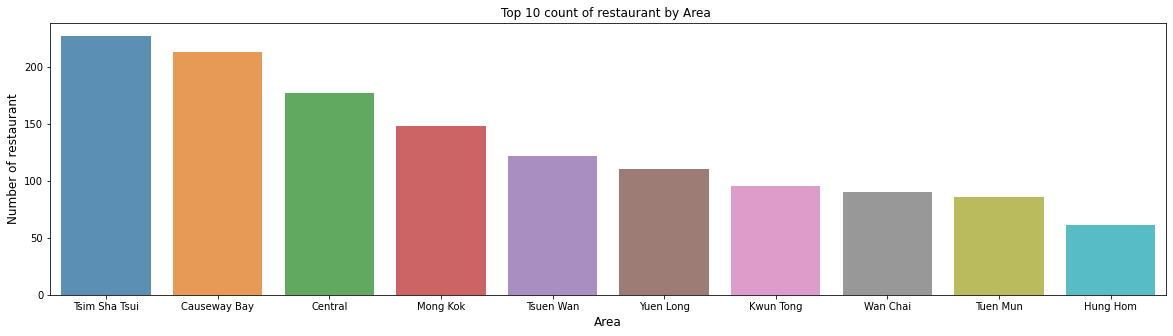

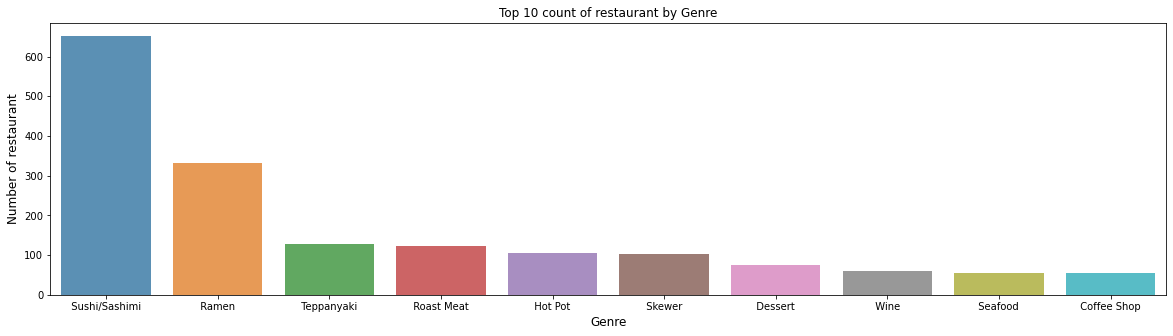

In [66]:
openrice=pd.read_csv("japanese restaurant_full.csv")
## Bar chart for all price range restuarant
PriceRange_count  = openrice['PriceRange'].value_counts()
plt.figure(figsize=(20,5))
sns.barplot(x=PriceRange_count.index, y=PriceRange_count.values, alpha=0.8)
plt.title('Counts of restaurant by Price Range ')
plt.ylabel('Number of restaurant', fontsize=12)
plt.xlabel('PriceRange', fontsize=12)
plt.show()

## Bar chart for Top 10 area of restuarant
restaurant_count  = openrice['Area'].value_counts()
restaurant_count = restaurant_count[:10,]
plt.figure(figsize=(20,5))
sns.barplot(x=restaurant_count.index, y=restaurant_count.values, alpha=0.8)
plt.title('Top 10 count of restaurant by Area ')
plt.ylabel('Number of restaurant', fontsize=12)
plt.xlabel('Area', fontsize=12)
plt.show()

## Bar chart for Top 10 food type of restuarant
Food_count  = openrice['Food'].value_counts()
Food_count = Food_count[:10,]

plt.figure(figsize=(20,5))
sns.barplot(x=Food_count.index, y=Food_count.values, alpha=0.8)
plt.title('Top 10 count of restaurant by Genre')
plt.ylabel('Number of restaurant', fontsize=12)
plt.xlabel('Genre', fontsize=12)
plt.show()

We also try to look into whether there are any visible correlation between the above criteria, as well as their relationship to the number of positive reviews and bookmarks

In [67]:
mask= openrice['Area'].isin(list(restaurant_count.index)) & openrice['Food'].isin(list(Food_count.index))
openrice=openrice[mask]


openrice[['Net Positive Review','Bookmarks']]=np.log(openrice[['Net Positive Review','Bookmarks']])

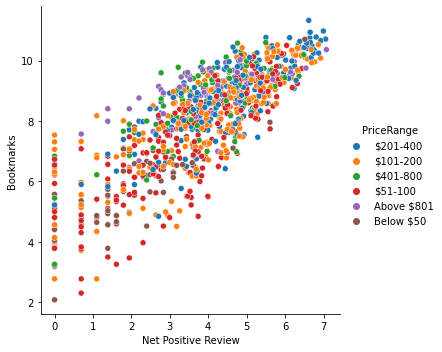

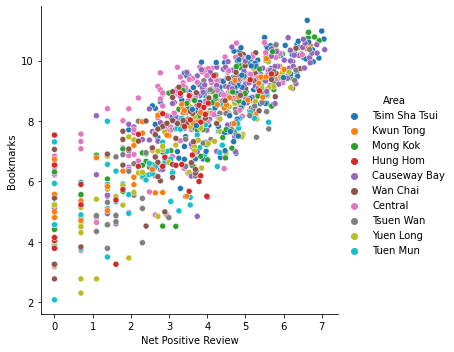

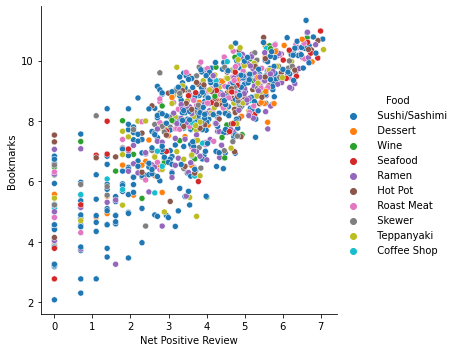

In [68]:
sns.relplot(data=openrice,x='Net Positive Review', y='Bookmarks',hue='PriceRange')
sns.relplot(data=openrice,x='Net Positive Review', y='Bookmarks',hue='Area')
sns.relplot(data=openrice,x='Net Positive Review', y='Bookmarks',hue='Food')



The clear relationship for the type of food, area, or price range with number of bookmarks or positive review here is not seen here, except a positively correlated relationship between the number of bookmarks and positive reivews.


In the later part of the project, the PCA dimensions reduction and knn clustering models are adopted to check if it is possible to identify an awarded restaurant through machine learning.